In [23]:
from numpy import where
import pandas as pd
from sklearn.datasets import make_classification
# from pycaret.clustering import *
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import plotly as py
import plotly.graph_objs as go

le = LabelEncoder()

In [24]:
df = pd.read_csv('for_clustering_math_outputs.csv')
df.head()

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,s,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,s,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,s,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,c,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,c,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [25]:
df['chatter_presence'] = le.fit_transform(df['chatter_presence'])
df.head() # s = 2; c = 0; i = 1

,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean
0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542
1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478
2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834
3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744
4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385


In [26]:
X = df[['chatter_presence', 'freq_max', 'fft_mean']]

In [27]:
kmeans = KMeans(n_clusters = 2, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\anaju\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\U

Text(0, 0.5, 'WCSS')

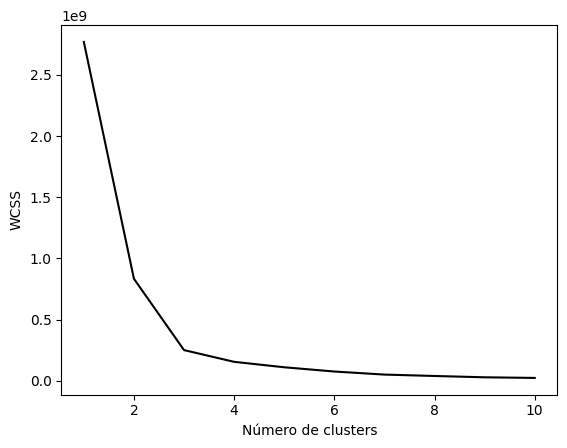

In [28]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
plt.plot(range(1, 11), wcss, c = 'k')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')

In [32]:
df['cluster'] = y_kmeans
df.head(40)
df[['chatter_presence', 'cluster']][df['chatter_presence'] == 2].sum()

chatter_presence    400
cluster              83
dtype: int64

In [34]:
temp = 83/200*100
temp

41.5

existem 200 arquivos classificados como sem chatter

83 deles estão sendo mal classificados como com chatter pelo Kmeans

41,5% está sendo mal classificado


In [35]:
df.chatter_presence.value_counts()

chatter_presence
2    200
0     88
1     76
Name: count, dtype: int64

In [30]:
df.cluster.value_counts()

cluster
0    202
1    162
Name: count, dtype: int64

In [36]:
df.to_csv('kmeans_output_26-05.csv')

In [6]:
import pandas as pd
hoje = pd.read_csv('kmeans_output_26-05.csv')

In [38]:
hoje.head(20)

,Unnamed: 0.1,Unnamed: 0,Experiment,chatter_presence,med,std,rms,curtose,distortion,amplitude,sra,crest,impulse,margin,max,freq_max,freq_sec_highest,fft_mean,cluster
0,0,0,s_320_045_split_1,2,0.005482,0.002285,0.005940,-0.684501,13046.608858,0.019401,0.005217,2.709846,2.934679,3.084994,0.016095,3075.253849,3314.593371,0.617542,1
1,1,1,s_320_015_split_0,2,0.005475,0.002081,0.005857,-0.254890,7052.357014,0.041907,0.005266,4.755544,5.084255,5.289695,0.027854,119.866400,696.665119,0.406478,0
2,2,2,s_320_020_split_3,2,0.005492,0.001971,0.005835,-1.170823,8819.340916,0.010459,0.005303,1.792693,1.904703,1.972551,0.010460,-119.598804,-1207.787922,0.159834,0
3,3,3,c_770_005_split_3,0,0.005414,0.040638,0.040996,0.898666,4733.248435,0.416909,0.026842,5.159852,6.625808,7.880688,0.205375,-945.862463,-845.862907,6.028744,0
4,4,4,c_770_002_split_0,0,0.005469,0.014140,0.015160,3.312443,1899.488742,0.160458,0.008789,5.493718,7.627771,9.475498,0.077174,933.575105,959.974401,1.305385,1
5,5,5,s_425_015_split_3,2,0.005484,0.002266,0.005933,-0.404051,6453.738698,0.020046,0.005229,2.738807,2.958255,3.107613,0.016250,-69.039448,-240.078079,0.288312,0
6,6,6,s_320_020_split_1,2,0.005496,0.001895,0.005813,-1.177768,8882.070680,0.009266,0.005323,1.780034,1.882869,1.943942,0.010348,4628.853711,4721.152788,0.128647,1
7,7,7,s_570_005_split_2,2,0.005491,0.002754,0.006143,-0.021513,1987.998272,0.018852,0.005137,2.511917,2.789928,3.003542,0.015431,-4848.515148,-4664.533547,0.118054,0
8,8,8,s_425_010_split_3,2,0.005486,0.002184,0.005905,-0.752341,7960.065910,0.015459,0.005242,2.220619,2.388901,2.501158,0.013112,-295.757634,-696.554428,0.255043,0
9,9,9,s_320_015_split_3,2,0.005489,0.002090,0.005873,-1.079827,15858.168508,0.013287,0.005273,2.115021,2.263134,2.355930,0.012422,-119.866400,-696.665119,0.384542,0


In [39]:
hoje[['Experiment', 'cluster']][hoje['Experiment'] == 'c_320_005_split_0']

,Experiment,cluster
97,c_320_005_split_0,1


In [40]:
hoje[['Experiment', 'cluster']][hoje['Experiment'] == 'c_320_005_split_1']


,Experiment,cluster
78,c_320_005_split_1,1


In [41]:
hoje[['Experiment', 'cluster']][hoje['Experiment'] == 'c_320_005_split_2']


,Experiment,cluster
141,c_320_005_split_2,0


In [42]:
hoje[['Experiment', 'cluster']][hoje['Experiment'] == 'c_320_005_split_3']


,Experiment,cluster
38,c_320_005_split_3,0


In [25]:
from os import listdir
import os.path
import shutil 

In [42]:
list_of_folders = listdir('split_cutting_tests_processed')
for folder in list_of_folders:
    list_of_files = listdir(f'split_cutting_tests_processed/{folder}')
    for file in list_of_files:
        print(f'{file}')
        print(hoje[["Experiment","cluster"]][hoje["Experiment"].str.contains(file[:-4])])

c_320_005_split_0.csv
           Experiment  cluster
97  c_320_005_split_0        1
c_320_005_split_0_noise_added.csv
Empty DataFrame
Columns: [Experiment, cluster]
Index: []
c_320_005_split_1.csv
           Experiment  cluster
78  c_320_005_split_1        1
c_320_005_split_1_noise_added.csv
Empty DataFrame
Columns: [Experiment, cluster]
Index: []
c_320_005_split_2.csv
            Experiment  cluster
141  c_320_005_split_2        0
c_320_005_split_2_noise_added.csv
Empty DataFrame
Columns: [Experiment, cluster]
Index: []
c_320_005_split_3.csv
           Experiment  cluster
38  c_320_005_split_3        0
c_320_005_split_3_noise_added.csv
Empty DataFrame
Columns: [Experiment, cluster]
Index: []
c_425_020_split_0.csv
            Experiment  cluster
144  c_425_020_split_0        1
c_425_020_split_0_noise_added.csv
Empty DataFrame
Columns: [Experiment, cluster]
Index: []
c_425_020_split_1.csv
            Experiment  cluster
101  c_425_020_split_1        1
c_425_020_split_1_noise_added.csv
E

In [39]:
hoje["Experiment"].str[-5:-4]

0      l
1      l
2      l
3      l
4      l
      ..
359    l
360    l
361    l
362    l
363    l
Name: Experiment, Length: 364, dtype: object